In [42]:
import warnings
warnings.filterwarnings('ignore')

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#to display all rows columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
#to display dataset in full width
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

In [45]:
#ipl_ball_by_ball_data

In [46]:
df= pd.read_csv('ipl_ball_by_ball_data.csv') #reading the data using pandas

In [47]:
df.head() #to see top 5 values and understand the data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.tail() #to see bottom 5 values and understand the data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208036,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.4,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,VR Iyer,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
208037,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.5,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.6,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,12.6,Chennai Super Kings,Kolkata Knight Riders,RV Uthappa,F du Plessis,CV Varun,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.6,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,CV Varun,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.isna().sum() #checking if there is any null value in any columns

match_id                  0     
season                    0     
start_date                0     
venue                     0     
innings                   0     
ball                      0     
batting_team              0     
bowling_team              0     
striker                   0     
non_striker               0     
bowler                    0     
runs_off_bat              0     
extras                    0     
wides                     201717
noballs                   207195
byes                      207494
legbyes                   204753
penalty                   208039
wicket_type               197802
player_dismissed          197802
other_wicket_type         208041
other_player_dismissed    208041
dtype: int64

In [50]:
#checking unique values of innings
df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [51]:
# inning 3 and 4 represent super over and 5 and 6 represent double super over data

In [52]:
df= df[(df.innings==1) | (df.innings==2)] #only considering match data neglecting super over data

In [53]:
df.innings.unique() # checking unique innings after previous step

array([2, 1], dtype=int64)

In [54]:
# What are the numbers when ABD faces Bumrah?
# step 1: Filter by player names
# step 2: Use these names & assign it to striker & bowler
# step 3: Get the required columns

In [55]:
df.bowling_team.unique() #finding the name of the teams

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [56]:
df[df.bowling_team=='Mumbai Indians']['bowler'].unique() #finding the name of bowlers

array(['DS Kulkarni', 'Harbhajan Singh', 'A Nehra', 'AM Nayar',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'JEC Franklin', 'MM Patel', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JJ Bumrah',
       'MG Johnson', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [57]:
#player 1: JJ Bumrah

In [58]:
#finding the name of the teams according to the data set
df[df.batting_team=='Royal Challengers Bangalore']['striker'].unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'R Dravid', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke',
       'B Akhil', 'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'Abdur Razzak', 'SP Goswami', 'KP Pietersen',
       'RV Uthappa', 'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh',
       'MK Pandey', 'RE van der Merwe', 'KP Appanna', 'D du Preez',
       'EJG Morgan', 'A Mithun', 'S Sriram', 'AUK Pathan',
       'AB de Villiers', 'TM Dilshan', 'SS Tiwary', 'MA Agarwal',
       'DL Vettori', 'CA Pujara', 'JJ van der Wath', 'R Ninan',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'KK Nair', 'DT Christian', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'Y

In [59]:
#player 1: JJ Bumrah
# player 2: 'AB de Villiers'

In [60]:
#creating a  new dataframe which is actually required 
req_df= df[(df.striker=='AB de Villiers') & (df.bowler=='JJ Bumrah')] #selecting when bowler is JJ Bumrah and Striker is AB de Villers

In [61]:
#checking top 5 values of new data frame
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95691,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95692,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95695,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95928,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.6,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95942,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#checking number of rows and columns in new data frame
req_df.shape

(86, 22)

In [63]:
#Number pf runs scored?
#Number of balls faced?
#Number of time dismissed?

In [64]:
req_df.runs_off_bat #all the balls run

95691     2
95692     1
95695     1
95928     0
95942     6
95943     0
95944     1
95946     0
100873    0
100874    0
100875    0
112402    0
119405    6
119406    6
119407    0
119408    1
119467    1
119472    1
119480    0
119504    2
119505    1
119522    1
119524    4
119525    2
119526    2
125636    1
125638    1
132075    1
132076    0
132077    0
132078    0
132079    0
132080    0
132099    1
139430    1
139431    6
139433    1
166261    1
166273    0
166276    0
166277    1
166304    1
166306    1
166308    0
166309    0
172149    0
172151    4
172152    0
172153    0
172200    0
172201    0
172206    0
172212    3
172215    1
172225    4
172226    4
172227    0
172228    0
172229    1
172252    0
181411    6
181414    1
181415    4
181423    6
181425    0
181426    6
181427    0
181428    4
190678    1
190679    0
193682    1
193687    1
193694    4
193695    2
193696    4
193697    1
193699    1
193724    0
193738    1
202698    0
202709    0
202710    4
202711    0
2027

In [65]:
#total runs scored
sum(req_df.runs_off_bat)

125

In [66]:
#balls faced
len(req_df)

86

In [67]:
#outs
req_df[req_df.player_dismissed =='AB de Villiers']

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
100873,733983,2014,2014-05-06,Wankhede Stadium,2,12.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,V Kohli,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,bowled,AB de Villiers,NaN,NaN
112402,829737,2015,2015-04-19,M Chinnaswamy Stadium,2,14.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,D Wiese,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,caught,AB de Villiers,NaN,NaN
202698,1254108,2021,2021-09-26,Dubai International Cricket Stadium,1,18.5,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,DT Christian,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,caught,AB de Villiers,NaN,NaN


In [68]:
#number of times abd got out by bumrah
len(req_df[req_df.player_dismissed =='AB de Villiers'])

3

In [69]:
#strike rate
(sum(req_df.runs_off_bat)/len(req_df))*100

145.3488372093023

In [70]:
#total number of match both played
len(req_df.match_id.unique()) #number of matches they have interacted

13

In [71]:
# Comparision against all batsman bumrah has bowled too

In [72]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
bumrah_df= df[df.bowler=='JJ Bumrah']

In [74]:
bumrah_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76627,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.6,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KB Arun Karthik,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76628,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.5,Royal Challengers Bangalore,Mumbai Indians,KB Arun Karthik,CH Gayle,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76629,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.4,Royal Challengers Bangalore,Mumbai Indians,KK Nair,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,lbw,KK Nair,NaN,NaN
76630,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.3,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76631,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.2,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
bumrah_df.shape


(2506, 22)

In [87]:
#runs scored by this batsman
bdf1=pd.DataFrame(bumrah_df.groupby('striker')['runs_off_bat'].sum())

In [89]:
bdf1 

,runs_off_bat
striker,
A Mishra,1
AB de Villiers,125
AD Nath,4
AD Russell,51
AJ Finch,24
AJ Turner,0
AJ Tye,11
AK Markram,2
AM Rahane,43


In [91]:
#balls faced by this batsman
bdf2=pd.DataFrame(bumrah_df.groupby('striker')['ball'].count())

In [98]:
bdf2

,ball
striker,
A Mishra,5
AB de Villiers,86
AD Nath,4
AD Russell,41
AJ Finch,29
AJ Turner,1
AJ Tye,7
AK Markram,2
AM Rahane,35


In [103]:
bdf3=bdf1.merge(bdf2, on= 'striker', how='left')

In [105]:
bdf3

,runs_off_bat,ball
striker,,
A Mishra,1,5
AB de Villiers,125,86
AD Nath,4,4
AD Russell,51,41
AJ Finch,24,29
AJ Turner,0,1
AJ Tye,11,7
AK Markram,2,2
AM Rahane,43,35


In [114]:
bdf3['strike_rate']=pd.DataFrame((bdf1.runs_off_bat/bdf2.ball)*100) #adding strike rate column

In [115]:
bdf3

,runs_off_bat,ball,strike_rate
striker,,,
A Mishra,1,5,20.000000
AB de Villiers,125,86,145.348837
AD Nath,4,4,100.000000
AD Russell,51,41,124.390244
AJ Finch,24,29,82.758621
AJ Turner,0,1,0.000000
AJ Tye,11,7,157.142857
AK Markram,2,2,100.000000
AM Rahane,43,35,122.857143


In [123]:
bdf3=bdf3[bdf3.ball>=30] #selecting people who have faced more than 30 balls

In [126]:
bdf3

,runs_off_bat,ball,strike_rate
striker,,,
AB de Villiers,125,86,145.348837
AD Russell,51,41,124.390244
AM Rahane,43,35,122.857143
AR Patel,21,32,65.625000
AT Rayudu,48,34,141.176471
CH Gayle,37,53,69.811321
DA Warner,54,47,114.893617
F du Plessis,58,34,170.588235
G Gambhir,29,33,87.878788


In [127]:
abd_df= df[df.striker == 'AB de Villiers']

In [143]:
#runs scored
adf1= pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum())

In [144]:
adf1

,runs_off_bat
bowler,
A Ashish Reddy,46
A Chandila,26
A Flintoff,34
A Kumble,39
A Mishra,40
A Nehra,61
A Nortje,16
A Singh,11
A Symonds,15


In [149]:
#balls faced
adf2= pd.DataFrame(abd_df.groupby('bowler')['ball'].count())

In [150]:
adf2

,ball
bowler,
A Ashish Reddy,18
A Chandila,11
A Flintoff,12
A Kumble,41
A Mishra,37
A Nehra,29
A Nortje,11
A Singh,7
A Symonds,12


In [151]:
adf3=adf1.merge(adf2, on= 'bowler', how='left')

In [152]:
adf3

,runs_off_bat,ball
bowler,,
A Ashish Reddy,46,18
A Chandila,26,11
A Flintoff,34,12
A Kumble,39,41
A Mishra,40,37
A Nehra,61,29
A Nortje,16,11
A Singh,11,7
A Symonds,15,12


In [153]:
adf3['strike_rate']=pd.DataFrame((adf1.runs_off_bat/adf2.ball)*100)

In [154]:
adf3

,runs_off_bat,ball,strike_rate
bowler,,,
A Ashish Reddy,46,18,255.555556
A Chandila,26,11,236.363636
A Flintoff,34,12,283.333333
A Kumble,39,41,95.121951
A Mishra,40,37,108.108108
A Nehra,61,29,210.344828
A Nortje,16,11,145.454545
A Singh,11,7,157.142857
A Symonds,15,12,125.000000


In [155]:
adf3=adf3[adf3.ball>=30]

In [156]:
adf3

,runs_off_bat,ball,strike_rate
bowler,,,
A Kumble,39,41,95.121951
A Mishra,40,37,108.108108
AD Russell,87,39,223.076923
AR Patel,71,70,101.428571
B Kumar,68,43,158.139535
CH Morris,71,35,202.857143
DJ Bravo,72,47,153.191489
DS Kulkarni,50,38,131.578947
HH Pandya,88,39,225.641026


In [157]:
adf3.sort_values('strike_rate', ascending=False)

,runs_off_bat,ball,strike_rate
bowler,,,
HH Pandya,88,39,225.641026
AD Russell,87,39,223.076923
JP Faulkner,62,30,206.666667
CH Morris,71,35,202.857143
Mohammed Shami,59,30,196.666667
SL Malinga,124,64,193.750000
Sandeep Sharma,107,57,187.719298
SB Jakati,55,30,183.333333
M Ashwin,55,31,177.419355


In [141]:
bdf3.sort_values('strike_rate', ascending=False)

,runs_off_bat,ball,strike_rate
striker,,,
JP Duminy,70,33,212.121212
MK Pandey,61,33,184.848485
F du Plessis,58,34,170.588235
KD Karthik,54,33,163.636364
V Kohli,126,85,148.235294
SS Iyer,59,40,147.500000
AB de Villiers,125,86,145.348837
RV Uthappa,52,36,144.444444
AT Rayudu,48,34,141.176471


In [158]:
bdf3.head()

,runs_off_bat,ball,strike_rate
striker,,,
AB de Villiers,125,86,145.348837
AD Russell,51,41,124.390244
AM Rahane,43,35,122.857143
AR Patel,21,32,65.625000
AT Rayudu,48,34,141.176471


In [223]:
##

In [216]:
adf3=adf3.reset_index()
adf3

,index,bowler,runs_off_bat,ball,strike_rate
0,0,A Kumble,39,41,95.121951
1,1,A Mishra,40,37,108.108108
2,2,AD Russell,87,39,223.076923
3,3,AR Patel,71,70,101.428571
4,4,B Kumar,68,43,158.139535
5,5,CH Morris,71,35,202.857143
6,6,DJ Bravo,72,47,153.191489
7,7,DS Kulkarni,50,38,131.578947
8,8,HH Pandya,88,39,225.641026
9,9,Harbhajan Singh,110,81,135.802469


In [222]:
##

In [210]:
bdf3=bdf3.reset_index()
bdf3

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,125,86,145.348837
1,AD Russell,51,41,124.390244
2,AM Rahane,43,35,122.857143
3,AR Patel,21,32,65.625000
4,AT Rayudu,48,34,141.176471
5,CH Gayle,37,53,69.811321
6,DA Warner,54,47,114.893617
7,F du Plessis,58,34,170.588235
8,G Gambhir,29,33,87.878788
9,GJ Maxwell,44,39,112.820513


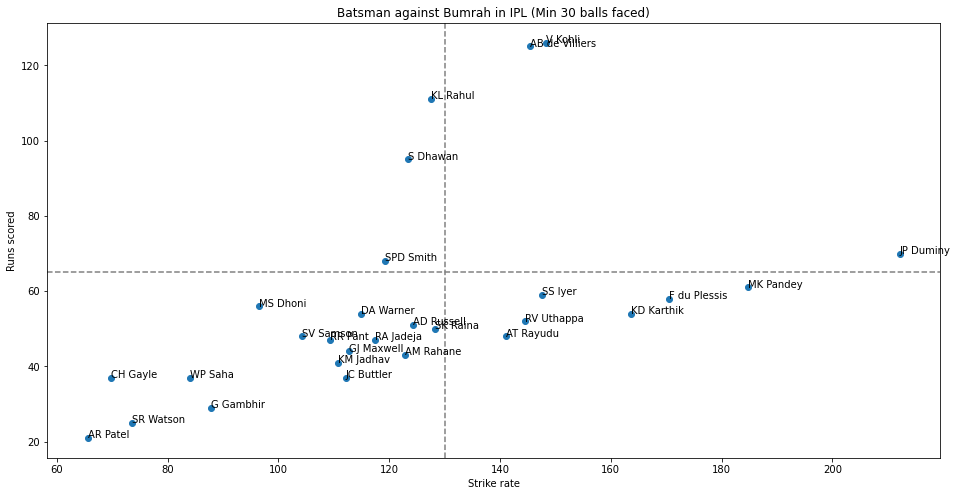

In [212]:
plt.figure(figsize=(16,8))
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)
for i in range(len(bdf3)):
    plt.text(bdf3['strike_rate'][i],bdf3['runs_off_bat'][i],bdf3["striker"][i])
plt.axvline(130,color='grey',ls='--')
plt.axhline(65,color='grey',ls='--')
plt.title('Batsman against Bumrah in IPL (Min 30 balls faced)')
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

In [220]:
adf3

,index,bowler,runs_off_bat,ball,strike_rate
0,0,A Kumble,39,41,95.121951
1,1,A Mishra,40,37,108.108108
2,2,AD Russell,87,39,223.076923
3,3,AR Patel,71,70,101.428571
4,4,B Kumar,68,43,158.139535
5,5,CH Morris,71,35,202.857143
6,6,DJ Bravo,72,47,153.191489
7,7,DS Kulkarni,50,38,131.578947
8,8,HH Pandya,88,39,225.641026
9,9,Harbhajan Singh,110,81,135.802469


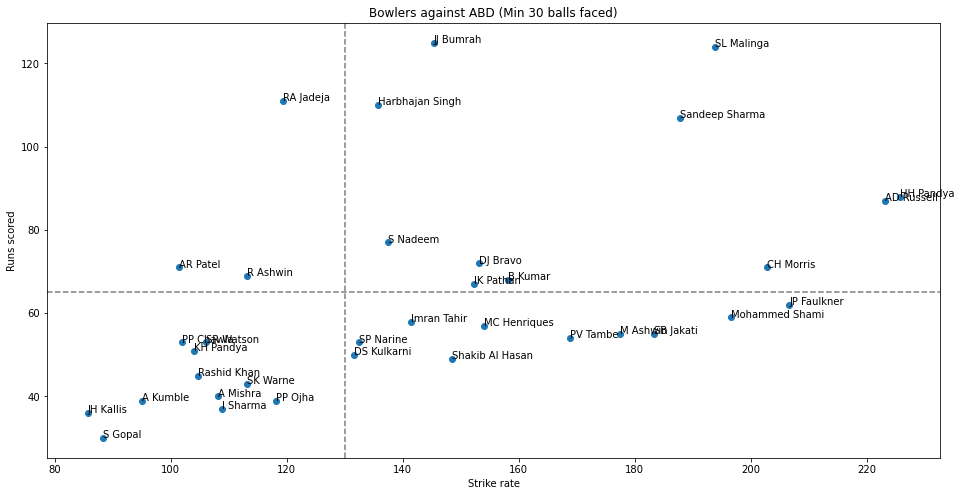

In [221]:
plt.figure(figsize=(16,8))
plt.scatter(adf3.strike_rate, adf3.runs_off_bat)
for i in range(len(adf3)):
    plt.text(adf3['strike_rate'][i],adf3['runs_off_bat'][i],adf3["bowler"][i])

plt.axvline(130,color='grey',ls='--')
plt.axhline(65,color='grey',ls='--')
plt.title('Bowlers against ABD (Min 30 balls faced)')
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

In [ ]:
###   ABD comes out to be dominant one when compared head to head with Jasprit Bumrah. 
### ABD has score most runs among all the batsman with a huge strike rate too
### and bumrah has conceded more runs at higher runrate when compared to other players